In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten ,Dense ,BatchNormalization
from keras.utils import to_categorical
from keras.datasets import mnist

In [13]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#reshape
x_train = x_train.reshape((x_train.shape[0],28,28,1)) 
x_test = x_test.reshape((x_test.shape[0],28,28,1))

#normalize
X_train = x_train.astype('float32') /255
x_test =  x_test.astype('float32') / 255

#one-hot coding
y_train = to_categorical(y_train,10)
y_test =to_categorical(y_test,10)

In [59]:
#model
model = Sequential()
#1st
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense((64),activation='relu'))
model.add(Dropout(0.25))

model.add(Dense((10),activation='softmax'))

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

history = model.fit(x_train,y_train,
                   epochs = 3,
                   batch_size=64,
                   validation_split=0.2)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,450 (365.04 KB)

 Trainable params: 93,386 (364.79 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7790 - loss: 0.6952 - val_accuracy: 0.9812 - val_loss: 0.0601
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9659 - loss: 0.1152 - val_accuracy: 0.9871 - val_loss: 0.0440
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9766 - loss: 0.0790 - val_accuracy: 0.9875 - val_loss: 0.0444


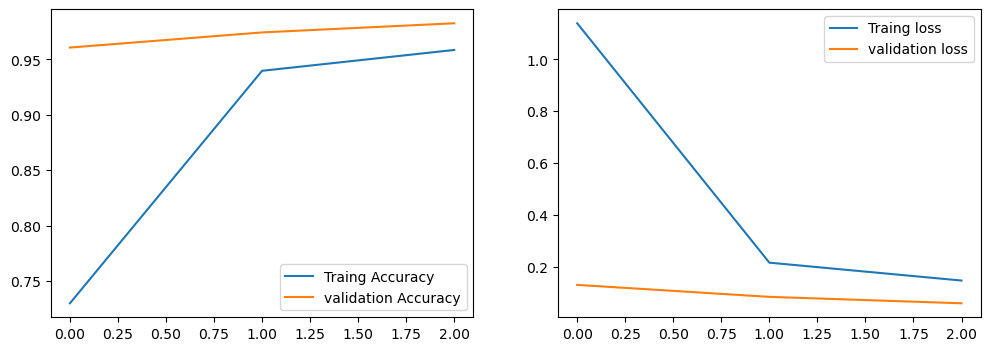

In [41]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] , label = "Traing Accuracy")
plt.plot(history.history['val_accuracy'], label = "validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'] , label = "Traing loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.legend()

In [61]:
pred = model.predict(x_test)

lable_pred = (pred > 0.1).astype(int)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
